# Mask R-CNN - Inspect Ballon Trained Model

Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [2]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.particle import particle

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
PARTICLE_WEIGHTS_PATH = "C:\Project\LIBNet\mask_rcnn_particle.h5"  # TODO: update this path

# Training

!python C:\Project\LIBNet\Mask_RCNN\samples\particle\particle.py train --dataset=C:\Project\LIBNet\datasets\particle --weights=coco

## Configurations

In [3]:
config = particle.ParticleConfig()
PARTICLE_DIR = os.path.join(ROOT_DIR, "..\datasets\particle")

In [12]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    IMAGE_RESIZE_MODE = "square"
    IMAGE_MIN_DIM = 800
    IMAGE_MAX_DIM = 1024

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.1
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE        

## Notebook Preferences

In [5]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
#DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0
DEVICE = "/gpu:0"

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [6]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Validation Dataset

In [13]:
# Load validation dataset
dataset = particle.ParticleDataset()
dataset.load_particle(PARTICLE_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 63
Classes: ['BG', 'particle']


## Load Model

In [14]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

In [15]:
# Set path to balloon weights file

# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
#weights_path = "C:\Project\logs\particle20190724T0737\mask_rcnn_particle_0100.h5"

weights_path = "C:\Project\logs\particle20190725T2129\mask_rcnn_particle_0132.h5"

# Or, load the last model you trained
#weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  C:\Project\logs\particle20190725T2129\mask_rcnn_particle_0132.h5
Re-starting from epoch 132


## Run Detection

image ID: particle.xy0240.jpg (1) C:\Project\LIBNet\Mask_RCNN\..\datasets\particle\val\xy0240.jpg
Original image shape:  [ 492 1324    3]
image_id:  1
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  246.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  142.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (40,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (40, 4)               min:   22.00000  max: 1023.00000  int32
gt_mask                  shape: (1024, 1024, 40)      min:    0.00000  max:    1.00000  bool
AP: 0.933381773011629
AP @0.50:	 0.933
AP @0.55:	 0.933
AP @0.60:	 0.933
AP @0.65:	 0.933
AP @0.70:	 0.933
AP @0.75:	 0.905
AP @0.80:	 0.836
AP @0.85:	 0.726
AP @0.90:	

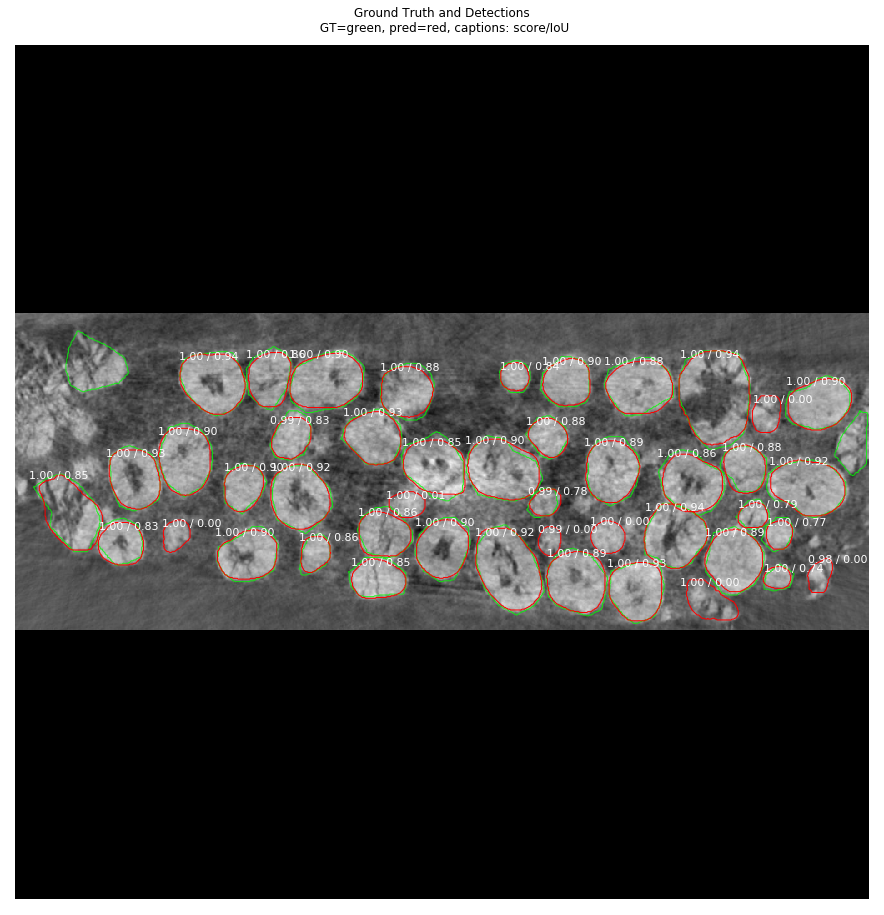

In [16]:
image_id = random.choice(dataset.image_ids)
#image_id = 53
#image_id = 12
#image_id=24
#image_id = 70
#image_id = 38 ##AP=1
#image_id = 29 ##AP=1
#image_id = 61 ##AP=1
#image_id = 16 ##AP=0.983
#image_id=49  ##few particles
#image_id=69 ##missed one
image_id = 1
#image_id = 62

image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
print("Original image shape: ", modellib.parse_image_meta(image_meta[np.newaxis,...])["original_image_shape"][0])

print("image_id: ", image_id)
# Run object detection
#results = model.detect_molded(np.expand_dims(image, 0), np.expand_dims(image_meta, 0), verbose=1)
results = model.detect([image], verbose=1)

# Display results
r = results[0]
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

AP, precisions, recalls, overlaps =\
            utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                              r['rois'], r['class_ids'], r['scores'], r['masks'])
print("AP:", AP)

# Compute AP over range 0.5 to 0.95 and print it
utils.compute_ap_range(gt_bbox, gt_class_id, gt_mask,
                       r['rois'], r['class_ids'], r['scores'], r['masks'],
                       verbose=1)

visualize.display_differences(
    image,
    gt_bbox, gt_class_id, gt_mask,
    r['rois'], r['class_ids'], r['scores'], r['masks'],
    dataset.class_names, ax=get_ax(),
    show_box=False, show_mask=False,
    iou_threshold=0.1, score_threshold=0.1)

In [ ]:
def random_crop(x, y, crop_size=(256,256)):
    assert x.shape[0] == y.shape[0]
    assert x.shape[1] == y.shape[1]
    h, w, _ = x.shape
    rangew = (w - crop_size[0]) // 2 if w>crop_size[0] else 0
    rangeh = (h - crop_size[1]) // 2 if h>crop_size[1] else 0
    offsetw = 0 if rangew == 0 else np.random.randint(rangew)
    offseth = 0 if rangeh == 0 else np.random.randint(rangeh)
    cropped_x = x[offseth:offseth+crop_size[0], offsetw:offsetw+crop_size[1], :]
    cropped_y = y[offseth:offseth+crop_size[0], offsetw:offsetw+crop_size[1], :]
    cropped_y = cropped_y[:, :, ~np.all(cropped_y==0, axis=(0,1))]
    if cropped_y.shape[-1] == 0:
        return x, y
    else:
        return cropped_x, cropped_y

In [ ]:
import colorsys
def random_colors(N, bright=True):
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors
def apply_mask(image, mask, color, alpha=1):
    for c in range(3):
        image[:, :, c] = np.where(mask == 1,
                                  image[:, :, c] *
                                  (1 - alpha) + alpha * color[c] * 255,
                                  image[:, :, c])
    return image

In [ ]:
from PIL import Image
import os, os.path
import skimage.draw
from numpy import zeros, newaxis
from PIL import Image, ImageDraw, ImageFont

def save_image(image, image_name, boxes, masks, class_ids, scores, class_names, filter_classs_names=None,
               scores_thresh=0.1, save_dir=None, mode=0):
    """
        image: image array
        image_name: image name
        boxes: [num_instance, (y1, x1, y2, x2, class_id)] in image coordinates.
        masks: [num_instances, height, width]
        class_ids: [num_instances]
        scores: confidence scores for each box
        class_names: list of class names of the dataset
        filter_classs_names: (optional) list of class names we want to draw
        scores_thresh: (optional) threshold of confidence scores
        save_dir: (optional) the path to store image
        mode: (optional) select the result which you want
                mode = 0 , save image with bbox,class_name,score and mask;
                mode = 1 , save image with bbox,class_name and score;
                mode = 2 , save image with class_name,score and mask;
                mode = 3 , save mask with black background;
    """
    mode_list = [0, 1, 2, 3]
    assert mode in mode_list, "mode's value should in mode_list %s" % str(mode_list)

    if save_dir is None:
        save_dir = os.path.join(os.getcwd(), "output")
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

    useful_mask_indices = []

    N = boxes.shape[0]
    if not N:
        print("\n*** No instances in image %s to draw *** \n" % (image_name))
        return
    else:
        assert boxes.shape[0] == masks.shape[-1] == class_ids.shape[0]

    for i in range(N):
        # filter
        class_id = class_ids[i]
        score = scores[i] if scores is not None else None
        if score is None or score < scores_thresh:
            continue

        label = class_names[class_id]
        if (filter_classs_names is not None) and (label not in filter_classs_names):
            continue

        if not np.any(boxes[i]):
            # Skip this instance. Has no bbox. Likely lost in image cropping.
            continue

        useful_mask_indices.append(i)

    if len(useful_mask_indices) == 0:
        print("\n*** No instances in image %s to draw *** \n" % (image_name))
        return

    colors = random_colors(len(useful_mask_indices))

    if mode != 3:
        masked_image = image.astype(np.uint8).copy()
    else:
        masked_image = np.zeros(image.shape).astype(np.uint8)

    if mode != 1:
        for index, value in enumerate(useful_mask_indices):
            masked_image = apply_mask(masked_image, masks[:, :, value], colors[index])

    masked_image = Image.fromarray(masked_image)

    if mode == 3:
        masked_image.save(os.path.join(save_dir, '%s' % (image_name)))
        return

    draw = ImageDraw.Draw(masked_image)
    colors = np.array(colors).astype(int) * 255

    for index, value in enumerate(useful_mask_indices):
        class_id = class_ids[value]
        score = scores[value]
        label = class_names[class_id]

        y1, x1, y2, x2 = boxes[value]
        if mode != 2:
            color = tuple(colors[index])
            draw.rectangle((x1, y1, x2, y2), outline=color)

        # Label
        font = ImageFont.truetype('/Library/Fonts/Arial.ttf', 15)
        draw.text((x1, y1), "%s %f" % (label, score), (255, 255, 255), font)

    masked_image.save(os.path.join(save_dir, '%s.jpg' % (image_name)))
    


In [ ]:
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=get_ax(),
                            title="Predictions")

save_image(image, "test.jpg", r['rois'], r['masks'], r['class_ids'], r['scores'], dataset.class_names,
               scores_thresh=0.5, save_dir='C:\Project\LIBNet\Mask_RCNN\output', mode=3)

log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

In [ ]:
max(mask[:,:,0].all())

In [ ]:
#mask = r['masks']
masked_image = Image.fromarray(mask[:,:,2])
save_dir='C:\Project\LIBNet\Mask_RCNN\output'
image_name = 'test.jpg'
plt.imshow(mask[:,:,1])
plt.show()
masked_image.save(os.path.join(save_dir, '%s' % (image_name)))

In [ ]:
mask = r['masks']
print(mask.shape)
MASK = np.zeros(mask[:,:,0].shape).astype(np.uint8)
for c in range(len(mask[0,0])):
        MASK = MASK + mask[:, :, c]*c*5

plt.imshow(MASK)
plt.show()


masked_image = Image.fromarray(MASK)
save_dir='C:\Project\LIBNet\Mask_RCNN\output'
image_name = 'test.tif'
plt.imshow(masked_image)
plt.show()
masked_image.save(os.path.join(save_dir, '%s' % (image_name)))

In [ ]:
imgs = []
path = "G:\\SLAC\\201907_slac_LIBNet\\ESRF machine learning\\LithB_Proj3_NMC622_50cyc_100nm_tomo_upperPart_.to-short.transformed\\"
valid_images = [".jpg"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    
    image = skimage.io.imread(os.path.join(path,f))

    image = skimage.color.gray2rgb(image)

    results = model.detect([image], verbose=1)

    # Display results
    r = results[0]
    #ax = get_ax(1)

    #visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
    #                        dataset.class_names, r['scores'], ax=ax,
    #                         title="Predictions")
    print(f)
    mask = r['masks']
    MASK = np.zeros(mask[:,:,0].shape).astype(np.uint8)
    for c in range(len(mask[0,0])):
            MASK = MASK + mask[:, :, c]*c*5

    masked_image = Image.fromarray(MASK)
    save_dir='C:\Project\LIBNet\Mask_RCNN\output'
    image_name = f
    masked_image.save(os.path.join(save_dir, '%s.tif' % (image_name)))

(810, 800, 3)
Processing 1 images
image                    shape: (810, 800, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
here
gt_class_id              shape: (40,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (40, 4)               min:   22.00000  max: 1023.00000  int32
gt_mask                  shape: (1024, 1024, 40)      min:    0.00000  max:    1.00000  bool


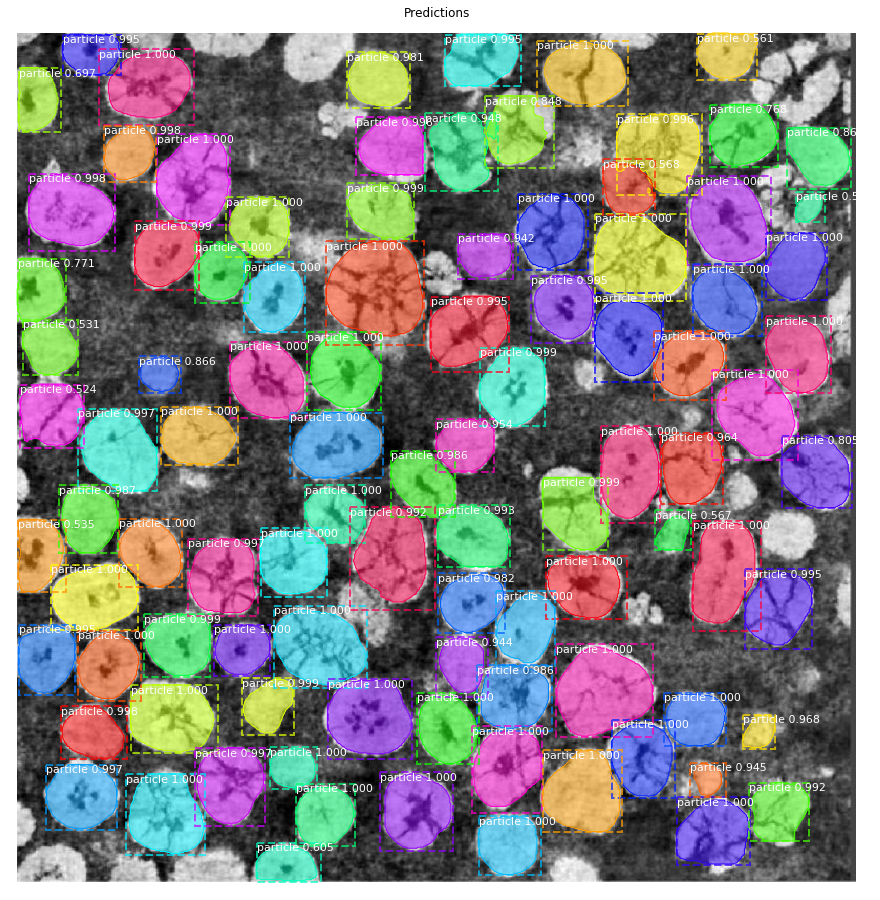

In [76]:
import skimage.draw
from numpy import zeros, newaxis
path = "C:\\Users\\Jizhou Li\\Desktop\\"
image = skimage.io.imread(path + "part4.jpg")

#image = skimage.color.gray2rgb(image)
print(image.shape)

#image, image = random_crop(image, image, crop_size=(800,800))
#image = image[300:,300:,:]
#fac = 0.6
#image = np.array(Image.fromarray(image).resize([int(np.round(image.shape[1]*fac)),int(np.round(image.shape[0]*fac))]))
    
results = model.detect([image], verbose=1)

# Display results
r = results[0]
ax = get_ax(1)

print('here')

visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

In [82]:
import skimage.draw
from PIL import Image
import matplotlib.pyplot as plt
from numpy import zeros, newaxis

def pyramidDetect(image, savefile):
    allMASK = np.zeros([image.shape[0], image.shape[1]]).astype(np.uint8)
    image0 = image
    for i in np.arange(0, 10.0, 1):
    #for i in np.arange(0, 1, 1):
        fac=0.5*(i+1)
        #fac = 1
        image = image0
        image = np.array(Image.fromarray(image).resize([int(np.round(image.shape[1]*fac)),int(np.round(image.shape[0]*fac))]))
    
        results = model.detect([image], verbose=0)

        # Display results
        r = results[0]
        ax = get_ax(1)
        
        mask = r['masks']
        MASK = np.zeros((image.shape[0],image.shape[1])).astype(np.uint8)
        for c in range(len(mask[0,0])):
            if(mask[:, :, c].sum()/len(mask[:, :, c])<20):
                MASK = MASK + mask[:, :, c]*1
                ##mask[:,:,c] = MASK
            
        allMASK = allMASK + np.array(Image.fromarray(MASK).resize([image0.shape[1], image0.shape[0]]))
        
        #print(dataset.class_names)
        
        #print(r['class_ids'])
        
        #visualize.display_instances(image, r['rois'], mask, r['class_ids'], 
        #                    dataset.class_names)
        
        #visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
        #                   dataset.class_names, r['scores'], ax=ax,
        #                    title="Predictions")
        
        #plt.imshow(allMASK)
        #plt.show()
        
        
    masked_image = Image.fromarray(allMASK)

    plt.subplot(121)
    plt.imshow(image0)
    plt.subplot(122)
    plt.imshow(allMASK)
    plt.show()

    masked_image.save(savefile)


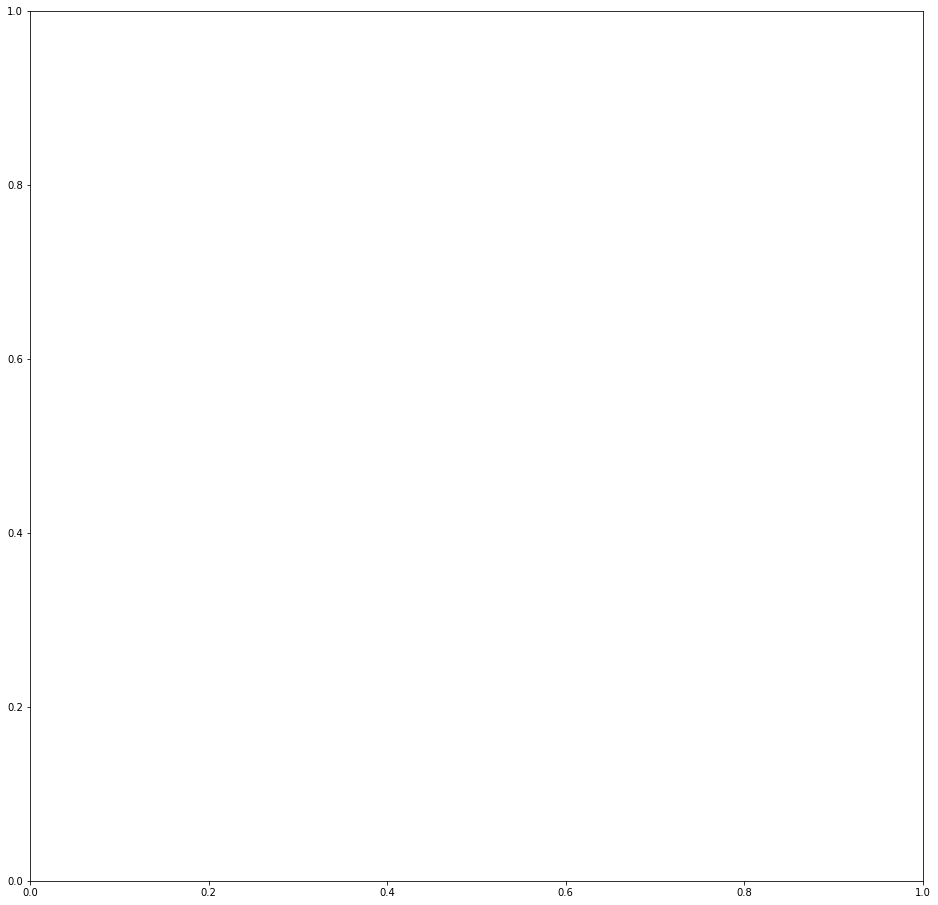

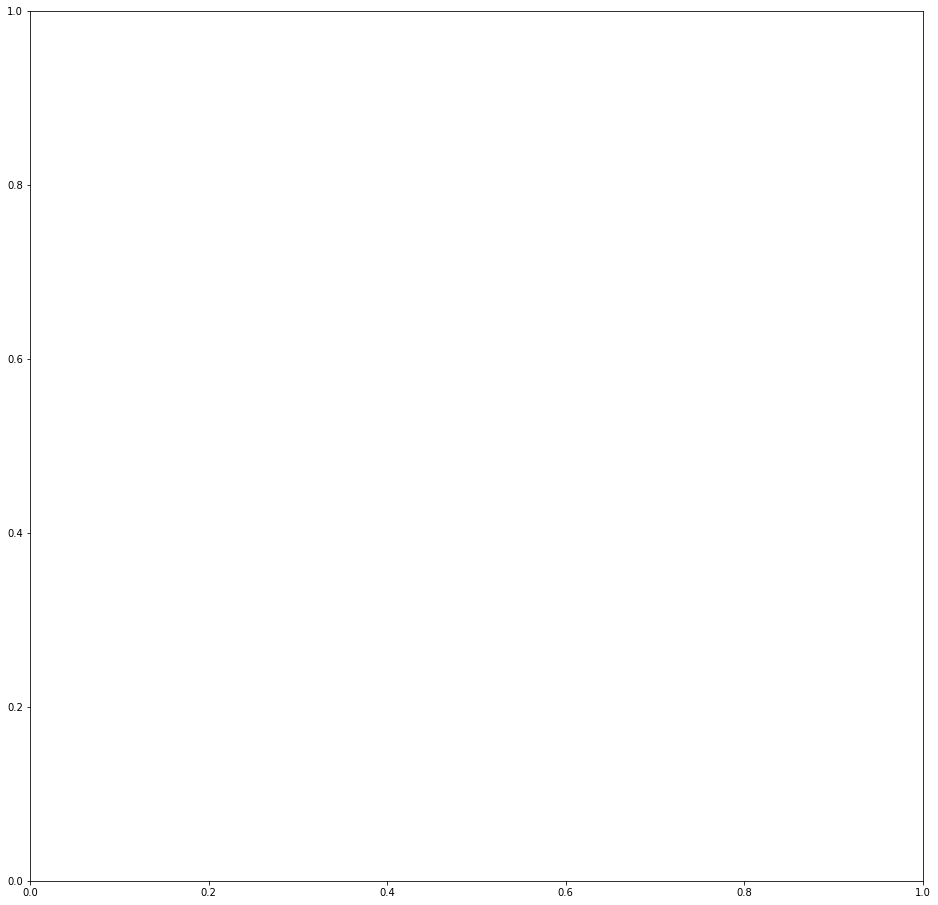

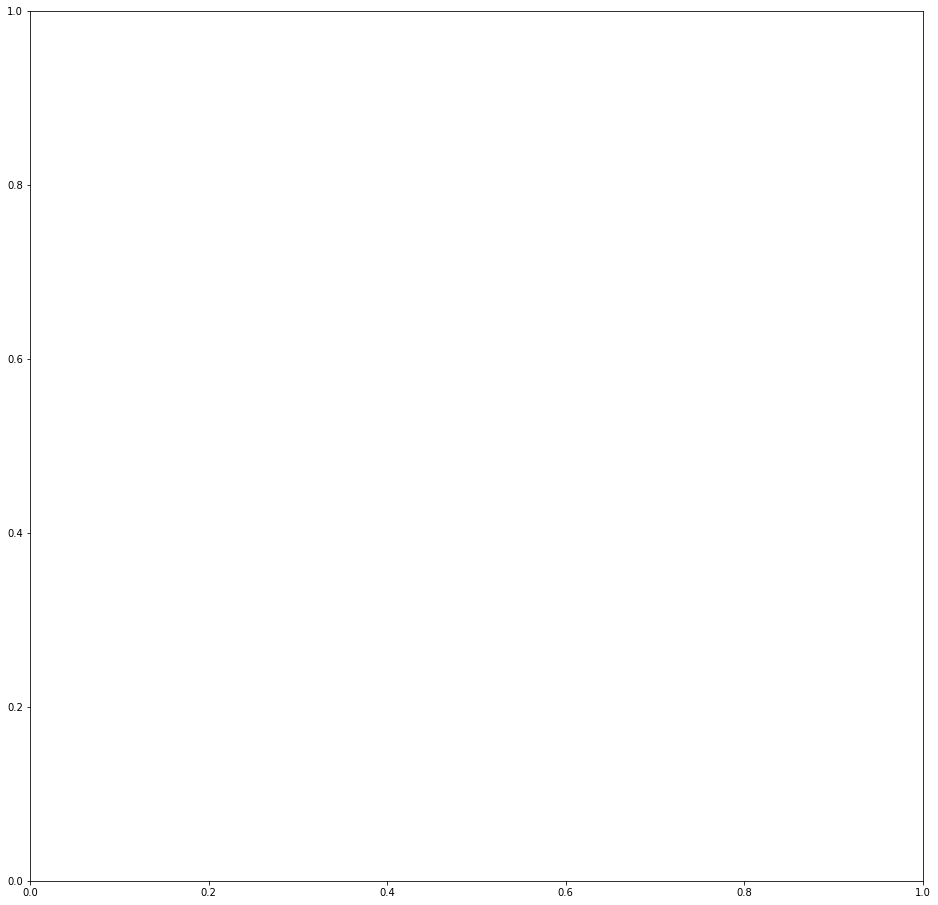

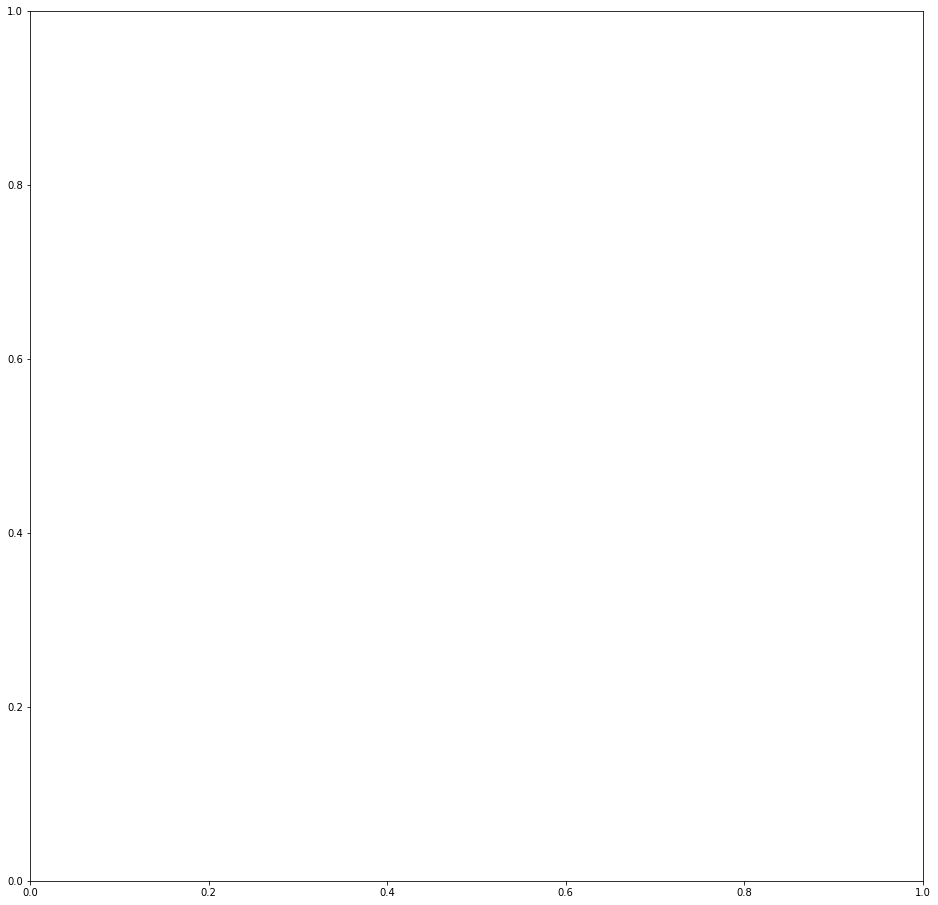

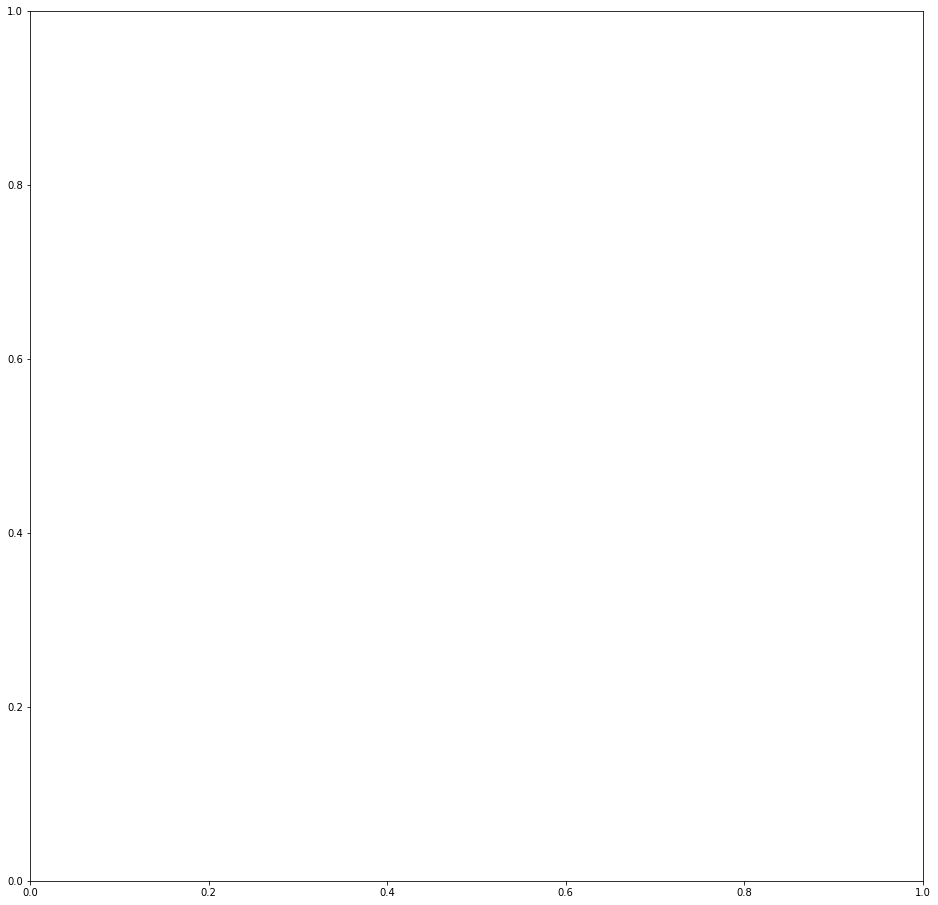

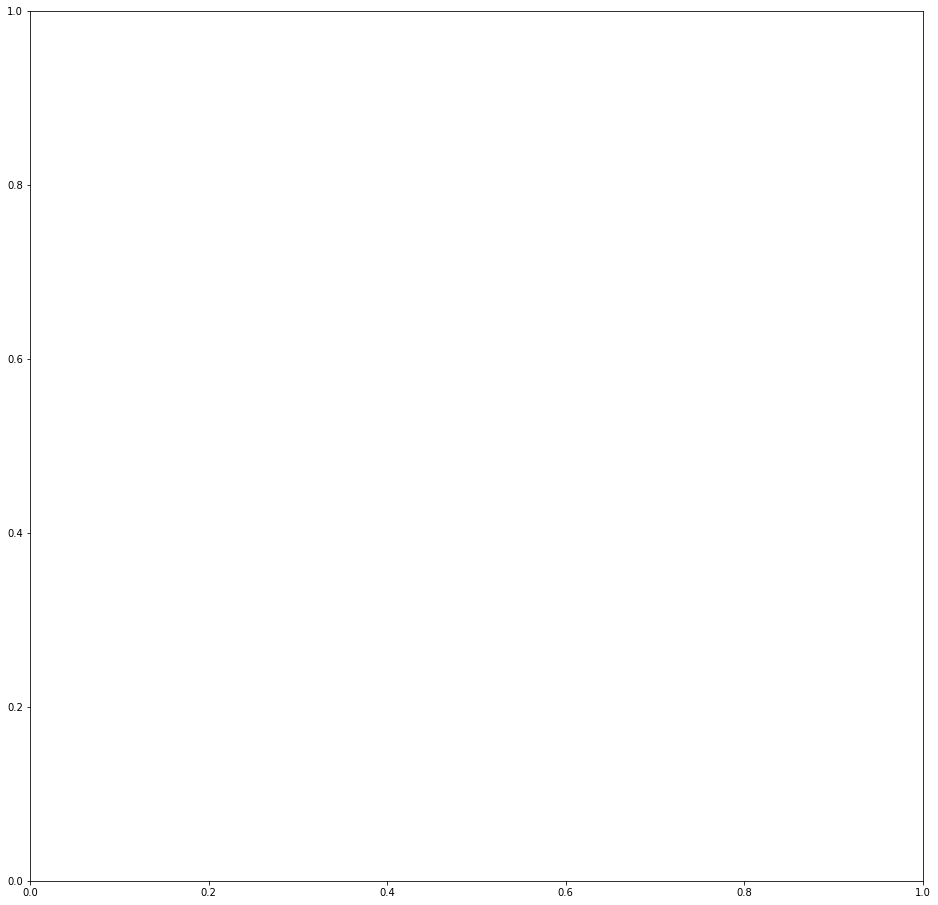

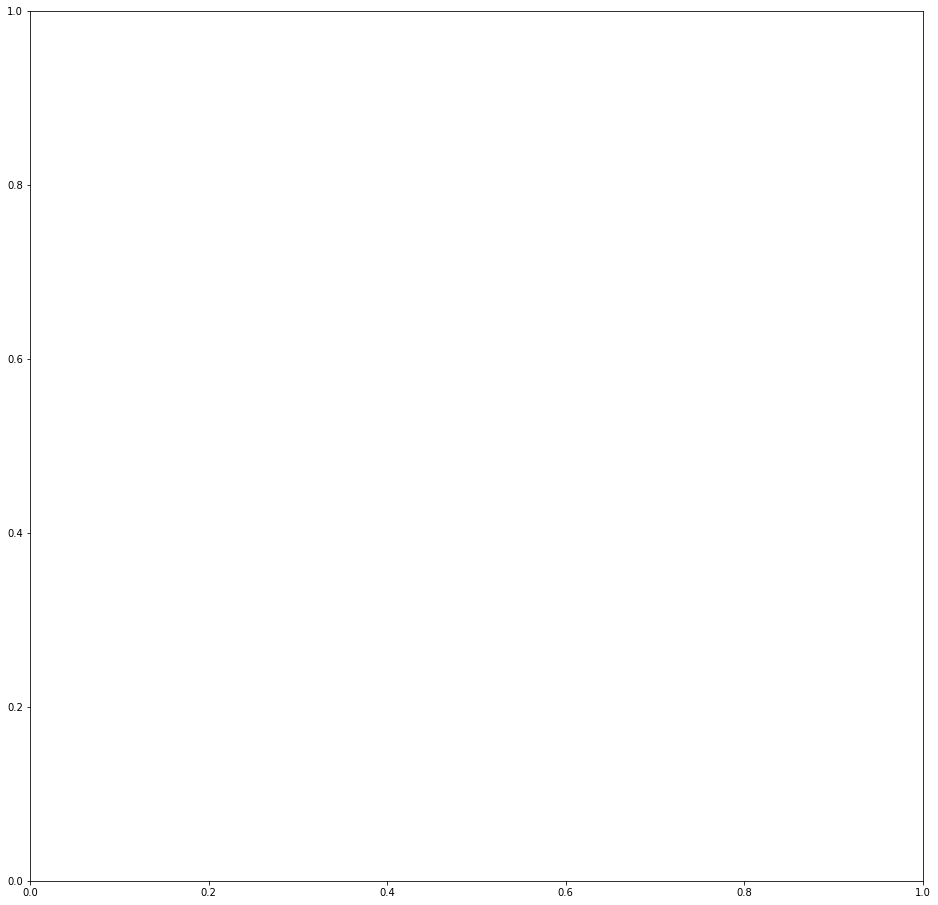

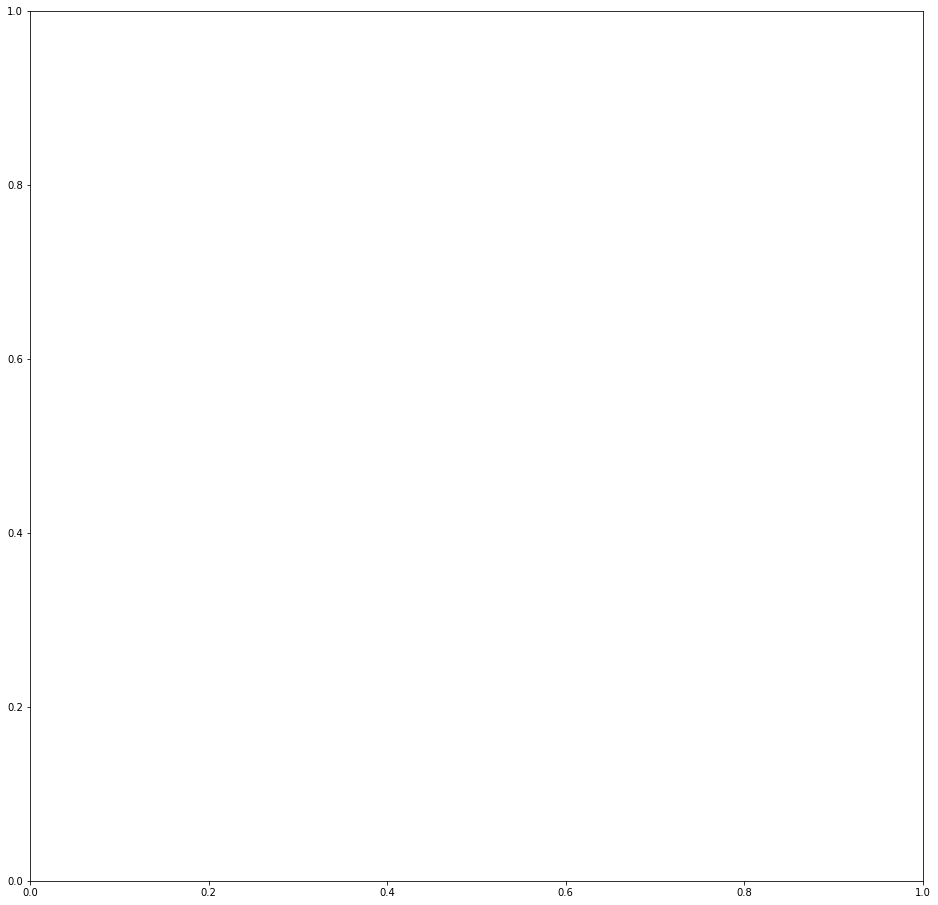

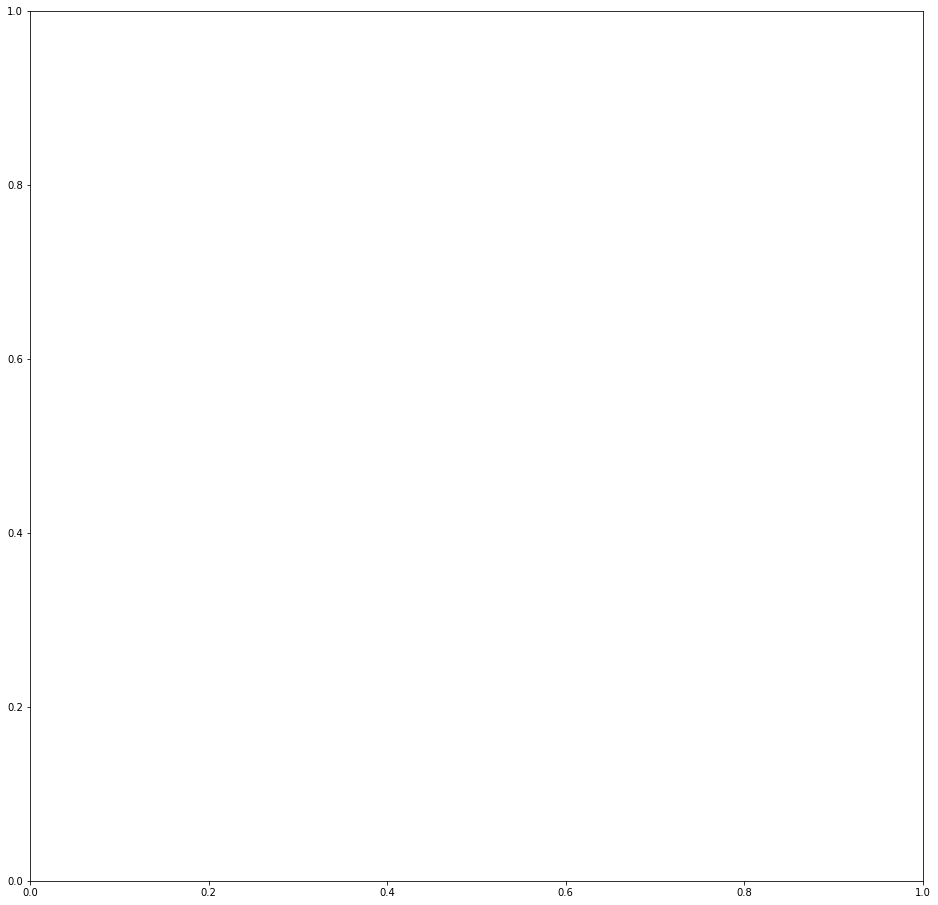

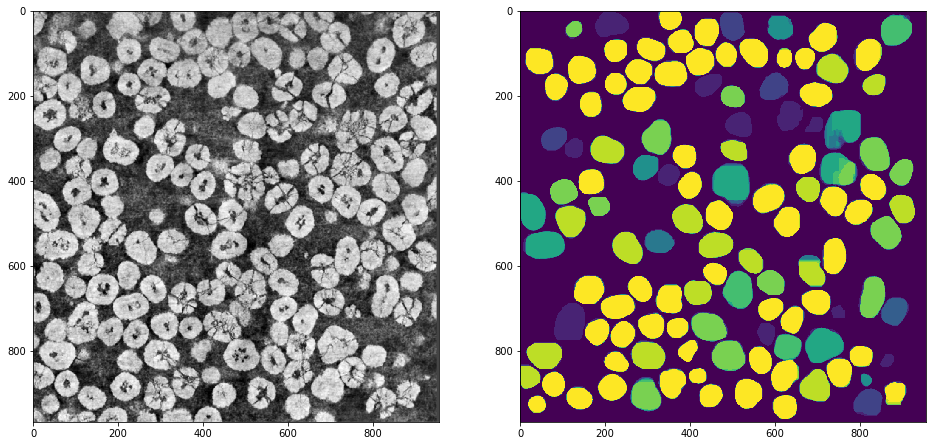

In [83]:
import skimage.draw
from PIL import Image
import matplotlib.pyplot as plt
from numpy import zeros, newaxis

savefile="C:\\Users\\Jizhou Li\\Desktop\\temp.tif"
image =skimage.io.imread("C:\\Users\\Jizhou Li\\Desktop\\slice.jpg")
image = skimage.color.gray2rgb(image)
pyramidDetect(image, savefile)

In [29]:
def random_crop(x, y, crop_size=(256,256)):
    assert x.shape[0] == y.shape[0]
    assert x.shape[1] == y.shape[1]
    h, w, _ = x.shape
    rangew = (w - crop_size[0]) // 2 if w>crop_size[0] else 0
    rangeh = (h - crop_size[1]) // 2 if h>crop_size[1] else 0
    offsetw = 0 if rangew == 0 else np.random.randint(rangew)
    offseth = 0 if rangeh == 0 else np.random.randint(rangeh)
    cropped_x = x[offseth:offseth+crop_size[0], offsetw:offsetw+crop_size[1], :]
    cropped_y = y[offseth:offseth+crop_size[0], offsetw:offsetw+crop_size[1], :]
    cropped_y = cropped_y[:, :, ~np.all(cropped_y==0, axis=(0,1))]
    if cropped_y.shape[-1] == 0:
        return x, y
    else:
        return cropped_x, cropped_y

In [ ]:
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [ ]:
import skimage.draw
import cv2
import matplotlib.pyplot as plot
from numpy import zeros, newaxis
path = "G:\\SLAC\\201907_slac_LIBNet\\ESRF machine learning\\all slice\\11_zhao\\image\\"
image = skimage.io.imread(path + "xz1191.jpg")
#image = skimage.io.imread(path + "yz0381.jpg")


image = skimage.io.imread("G:\\SLAC\\201907_slac_LIBNet\\ESRF machine learning\\all_yz_slice\\yzslice_0301.jpg")
(winW, winH) = (1024, 1024)
MASKall = zeros(image.shape)

for (x, y, window) in sliding_window(image, stepSize=1020, windowSize=(winW, winH)):
    print('here')
    # if the window does not meet our desired window size, ignore it
    #if window.shape[0] != winH or window.shape[1] != winW:
    #    continue
        
    window = skimage.color.gray2rgb(window)
    print(window.dtype)
    c = np.array(window, dtype=np.double)
    results = model.detect([window], verbose=1)

    # Display results
    r = results[0]
    ax = get_ax(1)

    
    mask = r['masks']
    MASK = np.zeros(mask[:,:,0].shape).astype(np.uint8)
    for c in range(len(mask[0,0])):
        MASK = MASK + mask[:, :, c]*c*0.01

    #import pdb; pdb.set_trace()
    masktmp = zeros(image.shape)
    masktmp[y:y + winW, x:x + winH] = MASK
    MASKall = MASKall + masktmp
    
    plot.imshow(MASKall)
    plot.show()



In [ ]:
import matplotlib.pyplot as plot
print("original size", image.shape)
plot.imshow(image)
plot.show()

image = skimage.io.imread("G:\\SLAC\\201907_slac_LIBNet\\ESRF machine learning\\all_yz_slice\\yzslice_0301.jpg")
image = skimage.color.gray2rgb(image)

#image, image = random_crop(image, image, (1024,1024))

M = np.float32([[1, 0, -100], [0, 1, 200]]) 

#image, image = random_crop(image, image, (1024,1024))
image = cv2.warpAffine(image, M, (1024,1024)) 

results = model.detect([image], verbose=1)

# Display results
r = results[0]
ax = get_ax(1)

print('here')

visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

In [ ]:
mask = r['masks']
MASK = np.zeros(mask[:,:,0].shape).astype(np.uint8)
for c in range(len(mask[0,0])):
    MASK = MASK + mask[:, :, c]*c*5

masked_image = Image.fromarray(MASK)
plot.imshow(masked_image)
plot.show()

## Precision recall

In [ ]:
# Draw precision-recall curve
AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'])
visualize.plot_precision_recall(AP, precisions, recalls)


In [ ]:
overlaps

In [ ]:
# Grid of ground truth objects and their predictions
visualize.plot_overlaps(gt_class_id, r['class_ids'], r['scores'],
                        overlaps, dataset.class_names)


In [ ]:
# Compute VOC-style Average Precision
def compute_batch_eval(image_ids):
    APs = []
    Precisions = []
    Recalls = []
    Overlaps = []
    for image_id in image_ids:
        # Load image
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(dataset, config,
                                   image_id, use_mini_mask=False)
        # Run object detection
        results = model.detect([image], verbose=0)
        # Compute AP
        r = results[0]
        AP, precisions, recalls, overlaps =\
            utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                              r['rois'], r['class_ids'], r['scores'], r['masks'])
        #print(AP, ' + ', precisions, ' + ',recalls, ' + ',overlaps )
        APs.append(AP)
        
        tmp = recalls<0.8
        Precisions.append(precisions.mean())
        Recalls.append(np.sum(tmp) / len(recalls))
        Overlaps.append(overlaps.max())
    
    
    #print("Precisions @ IoU=50: ", np.mean(Precisions))
    #print("Recalls @ IoU=50: ", np.mean(Recalls))
    #print("Overlaps @ IoU=50: ", np.mean(Overlaps))
    #print("mAP @ IoU=50: ", np.mean(APs))
    
    return APs, Precisions, Recalls, Overlaps

# Pick a set of random images
image_ids = np.random.choice(dataset.image_ids, 10)
APs, Precisions, Recalls, Overlaps = compute_batch_eval(image_ids)


In [ ]:
Recalls[3]

In [ ]:
print("Precisions : ", np.mean(Precisions))
print("Recalls @ IoU=50: ", np.mean(Recalls))
print("Overlaps @ IoU=50: ", np.mean(Overlaps))
print("mAP @ IoU=50: ", np.mean(APs))

In [ ]:
print("Precisions : ", np.std(Precisions))
print("Recalls @ IoU=50: ", np.std(Recalls))
print("Overlaps @ IoU=50: ", np.std(Overlaps))
print("mAP @ IoU=50: ", np.std(APs))

In [ ]:
objects = ('mPrecisions', 'mRecalls', 'mOverlaps', 'mAP')
y_pos = np.arange(len(objects))
performance = [np.mean(Precisions), np.mean(Recalls), np.mean(Overlaps), np.mean(APs)]
standard = [np.std(Precisions), np.std(Recalls), np.std(Overlaps), np.std(APs)]


plt.bar(y_pos, performance, yerr=standard,align='center', alpha=0.5,capsize =10)
plt.xticks(y_pos, objects)
plt.ylabel('Values')
plt.title('Performance Evaluation')


plt.savefig('filename.png', dpi=500)


plt.show()

In [ ]:
def compute_batch_ap(dataset, image_ids, verbose=1):
    APs = []
    for image_id in image_ids:
        # Load image
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(dataset, config,
                                   image_id, use_mini_mask=False)
        # Run object detection
        results = model.detect_molded(image[np.newaxis], image_meta[np.newaxis], verbose=0)
        # Compute AP over range 0.5 to 0.95
        r = results[0]
        ap = utils.compute_ap_range(
            gt_bbox, gt_class_id, gt_mask,
            r['rois'], r['class_ids'], r['scores'], r['masks'],
            verbose=0)
        APs.append(ap)
        if verbose:
            info = dataset.image_info[image_id]
            meta = modellib.parse_image_meta(image_meta[np.newaxis,...])
            print("{:3} {}   AP: {:.2f}".format(
                meta["image_id"][0], meta["original_image_shape"][0], ap))
    return APs

# Run on validation set
limit = 5
APs = compute_batch_ap(dataset, dataset.image_ids[:limit])
print("Mean AP overa {} images: {:.4f}".format(len(APs), np.mean(APs)))

In [ ]:
# Get activations of a few sample layers
activations = model.run_graph([image], [
    ("input_image",        tf.identity(model.keras_model.get_layer("input_image").output)),
    ("res2c_out",          model.keras_model.get_layer("res2c_out").output),
    ("res3c_out",          model.keras_model.get_layer("res3c_out").output),
    ("res4w_out",          model.keras_model.get_layer("res4w_out").output),  # for resnet100
    ("rpn_bbox",           model.keras_model.get_layer("rpn_bbox").output),
    ("roi",                model.keras_model.get_layer("ROI").output),
])

# Input image (normalized)
_ = plt.imshow(modellib.unmold_image(activations["input_image"][0],config))

# Backbone feature map
#display_images(np.transpose(activations["res2c_out"][0,:,:,:4], [2, 0, 1]), cols=4)
display_images(np.transpose(activations["res4w_out"][0,:,:,:10], [2, 0, 1]))
display_images(np.transpose(activations["res3c_out"][0,:,:,:10], [2, 0, 1]))



In [ ]:
# Histograms of RPN bounding box deltas
plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.title("dy")
_ = plt.hist(activations["rpn_bbox"][0,:,0], 50)
plt.subplot(1, 4, 2)
plt.title("dx")
_ = plt.hist(activations["rpn_bbox"][0,:,1], 50)
plt.subplot(1, 4, 3)
plt.title("dw")
_ = plt.hist(activations["rpn_bbox"][0,:,2], 50)
plt.subplot(1, 4, 4)
plt.title("dh")
_ = plt.hist(activations["rpn_bbox"][0,:,3], 50)

In [ ]:
# Distribution of y, x coordinates of generated proposals
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("y1, x1")
plt.scatter(activations["roi"][0,:,0], activations["roi"][0,:,1])
plt.subplot(1, 2, 2)
plt.title("y2, x2")
plt.scatter(activations["roi"][0,:,2], activations["roi"][0,:,3])
plt.show()


===================================

In [ ]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

In [ ]:
image_id

## Color Splash

This is for illustration. You can call `balloon.py` with the `splash` option to get better images without the black padding.

In [ ]:
splash = particle.color_splash(image, r['masks'])
display_images([splash], cols=1)

## Step by Step Prediction

## Stage 1: Region Proposal Network

The Region Proposal Network (RPN) runs a lightweight binary classifier on a lot of boxes (anchors) over the image and returns object/no-object scores. Anchors with high *objectness* score (positive anchors) are passed to the stage two to be classified.

Often, even positive anchors don't cover objects fully. So the RPN also regresses a refinement (a delta in location and size) to be applied to the anchors to shift it and resize it a bit to the correct boundaries of the object.

### 1.a RPN Targets

The RPN targets are the training values for the RPN. To generate the targets, we start with a grid of anchors that cover the full image at different scales, and then we compute the IoU of the anchors with ground truth object. Positive anchors are those that have an IoU >= 0.7 with any ground truth object, and negative anchors are those that don't cover any object by more than 0.3 IoU. Anchors in between (i.e. cover an object by IoU >= 0.3 but < 0.7) are considered neutral and excluded from training.

To train the RPN regressor, we also compute the shift and resizing needed to make the anchor cover the ground truth object completely.

In [ ]:
# Generate RPN trainig targets
# target_rpn_match is 1 for positive anchors, -1 for negative anchors
# and 0 for neutral anchors.
target_rpn_match, target_rpn_bbox = modellib.build_rpn_targets(
    image.shape, model.anchors, gt_class_id, gt_bbox, model.config)
log("target_rpn_match", target_rpn_match)
log("target_rpn_bbox", target_rpn_bbox)

positive_anchor_ix = np.where(target_rpn_match[:] == 1)[0]
negative_anchor_ix = np.where(target_rpn_match[:] == -1)[0]
neutral_anchor_ix = np.where(target_rpn_match[:] == 0)[0]
positive_anchors = model.anchors[positive_anchor_ix]
negative_anchors = model.anchors[negative_anchor_ix]
neutral_anchors = model.anchors[neutral_anchor_ix]
log("positive_anchors", positive_anchors)
log("negative_anchors", negative_anchors)
log("neutral anchors", neutral_anchors)

# Apply refinement deltas to positive anchors
refined_anchors = utils.apply_box_deltas(
    positive_anchors,
    target_rpn_bbox[:positive_anchors.shape[0]] * model.config.RPN_BBOX_STD_DEV)
log("refined_anchors", refined_anchors, )


In [ ]:
# Display positive anchors before refinement (dotted) and
# after refinement (solid).
visualize.draw_boxes(image, boxes=positive_anchors, refined_boxes=refined_anchors, ax=get_ax())

### 1.b RPN Predictions

Here we run the RPN graph and display its predictions.

In [ ]:
# Run RPN sub-graph
pillar = model.keras_model.get_layer("ROI").output  # node to start searching from

# TF 1.4 and 1.9 introduce new versions of NMS. Search for all names to support TF 1.3~1.10
nms_node = model.ancestor(pillar, "ROI/rpn_non_max_suppression:0")
if nms_node is None:
    nms_node = model.ancestor(pillar, "ROI/rpn_non_max_suppression/NonMaxSuppressionV2:0")
if nms_node is None: #TF 1.9-1.10
    nms_node = model.ancestor(pillar, "ROI/rpn_non_max_suppression/NonMaxSuppressionV3:0")

rpn = model.run_graph([image], [
    ("rpn_class", model.keras_model.get_layer("rpn_class").output),
    ("pre_nms_anchors", model.ancestor(pillar, "ROI/pre_nms_anchors:0")),
    ("refined_anchors", model.ancestor(pillar, "ROI/refined_anchors:0")),
    ("refined_anchors_clipped", model.ancestor(pillar, "ROI/refined_anchors_clipped:0")),
    ("post_nms_anchor_ix", nms_node),
    ("proposals", model.keras_model.get_layer("ROI").output),
])

In [ ]:
# Show top anchors by score (before refinement)
limit = 100
sorted_anchor_ids = np.argsort(rpn['rpn_class'][:,:,1].flatten())[::-1]
visualize.draw_boxes(image, boxes=model.anchors[sorted_anchor_ids[:limit]], ax=get_ax())

In [ ]:
# Show top anchors with refinement. Then with clipping to image boundaries
limit = 50
ax = get_ax(1, 2)
pre_nms_anchors = utils.denorm_boxes(rpn["pre_nms_anchors"][0], image.shape[:2])
refined_anchors = utils.denorm_boxes(rpn["refined_anchors"][0], image.shape[:2])
refined_anchors_clipped = utils.denorm_boxes(rpn["refined_anchors_clipped"][0], image.shape[:2])
visualize.draw_boxes(image, boxes=pre_nms_anchors[:limit],
                     refined_boxes=refined_anchors[:limit], ax=ax[0])
visualize.draw_boxes(image, refined_boxes=refined_anchors_clipped[:limit], ax=ax[1])

In [ ]:
# Show refined anchors after non-max suppression
limit = 50
ixs = rpn["post_nms_anchor_ix"][:limit]
visualize.draw_boxes(image, refined_boxes=refined_anchors_clipped[ixs], ax=get_ax())

In [ ]:
# Show final proposals
# These are the same as the previous step (refined anchors 
# after NMS) but with coordinates normalized to [0, 1] range.
limit = 50
# Convert back to image coordinates for display
h, w = config.IMAGE_SHAPE[:2]
proposals = rpn['proposals'][0, :limit] * np.array([h, w, h, w])
visualize.draw_boxes(image, refined_boxes=proposals, ax=get_ax())

## Stage 2: Proposal Classification

This stage takes the region proposals from the RPN and classifies them.

### 2.a Proposal Classification

Run the classifier heads on proposals to generate class propbabilities and bounding box regressions.

In [ ]:
# Get input and output to classifier and mask heads.
mrcnn = model.run_graph([image], [
    ("proposals", model.keras_model.get_layer("ROI").output),
    ("probs", model.keras_model.get_layer("mrcnn_class").output),
    ("deltas", model.keras_model.get_layer("mrcnn_bbox").output),
    ("masks", model.keras_model.get_layer("mrcnn_mask").output),
    ("detections", model.keras_model.get_layer("mrcnn_detection").output),
])

In [ ]:
# Get detection class IDs. Trim zero padding.
det_class_ids = mrcnn['detections'][0, :, 4].astype(np.int32)
det_count = np.where(det_class_ids == 0)[0][0]
det_class_ids = det_class_ids[:det_count]
detections = mrcnn['detections'][0, :det_count]

print("{} detections: {}".format(
    det_count, np.array(dataset.class_names)[det_class_ids]))

captions = ["{} {:.3f}".format(dataset.class_names[int(c)], s) if c > 0 else ""
            for c, s in zip(detections[:, 4], detections[:, 5])]
visualize.draw_boxes(
    image, 
    refined_boxes=utils.denorm_boxes(detections[:, :4], image.shape[:2]),
    visibilities=[2] * len(detections),
    captions=captions, title="Detections",
    ax=get_ax())

### 2.c Step by Step Detection

Here we dive deeper into the process of processing the detections.

In [ ]:
# Proposals are in normalized coordinates. Scale them
# to image coordinates.
h, w = config.IMAGE_SHAPE[:2]
proposals = np.around(mrcnn["proposals"][0] * np.array([h, w, h, w])).astype(np.int32)

# Class ID, score, and mask per proposal
roi_class_ids = np.argmax(mrcnn["probs"][0], axis=1)
roi_scores = mrcnn["probs"][0, np.arange(roi_class_ids.shape[0]), roi_class_ids]
roi_class_names = np.array(dataset.class_names)[roi_class_ids]
roi_positive_ixs = np.where(roi_class_ids > 0)[0]

# How many ROIs vs empty rows?
print("{} Valid proposals out of {}".format(np.sum(np.any(proposals, axis=1)), proposals.shape[0]))
print("{} Positive ROIs".format(len(roi_positive_ixs)))

# Class counts
print(list(zip(*np.unique(roi_class_names, return_counts=True))))

In [ ]:
# Display a random sample of proposals.
# Proposals classified as background are dotted, and
# the rest show their class and confidence score.
limit = 200
ixs = np.random.randint(0, proposals.shape[0], limit)
captions = ["{} {:.3f}".format(dataset.class_names[c], s) if c > 0 else ""
            for c, s in zip(roi_class_ids[ixs], roi_scores[ixs])]
visualize.draw_boxes(image, boxes=proposals[ixs],
                     visibilities=np.where(roi_class_ids[ixs] > 0, 2, 1),
                     captions=captions, title="ROIs Before Refinement",
                     ax=get_ax())

#### Apply Bounding Box Refinement

In [ ]:
# Class-specific bounding box shifts.
roi_bbox_specific = mrcnn["deltas"][0, np.arange(proposals.shape[0]), roi_class_ids]
log("roi_bbox_specific", roi_bbox_specific)

# Apply bounding box transformations
# Shape: [N, (y1, x1, y2, x2)]
refined_proposals = utils.apply_box_deltas(
    proposals, roi_bbox_specific * config.BBOX_STD_DEV).astype(np.int32)
log("refined_proposals", refined_proposals)

# Show positive proposals
# ids = np.arange(roi_boxes.shape[0])  # Display all
limit = 5
ids = np.random.randint(0, len(roi_positive_ixs), limit)  # Display random sample
captions = ["{} {:.3f}".format(dataset.class_names[c], s) if c > 0 else ""
            for c, s in zip(roi_class_ids[roi_positive_ixs][ids], roi_scores[roi_positive_ixs][ids])]
visualize.draw_boxes(image, boxes=proposals[roi_positive_ixs][ids],
                     refined_boxes=refined_proposals[roi_positive_ixs][ids],
                     visibilities=np.where(roi_class_ids[roi_positive_ixs][ids] > 0, 1, 0),
                     captions=captions, title="ROIs After Refinement",
                     ax=get_ax())

#### Filter Low Confidence Detections

In [ ]:
# Remove boxes classified as background
keep = np.where(roi_class_ids > 0)[0]
print("Keep {} detections:\n{}".format(keep.shape[0], keep))

In [ ]:
# Remove low confidence detections
keep = np.intersect1d(keep, np.where(roi_scores >= config.DETECTION_MIN_CONFIDENCE)[0])
print("Remove boxes below {} confidence. Keep {}:\n{}".format(
    config.DETECTION_MIN_CONFIDENCE, keep.shape[0], keep))

#### Per-Class Non-Max Suppression

In [ ]:
# Apply per-class non-max suppression
pre_nms_boxes = refined_proposals[keep]
pre_nms_scores = roi_scores[keep]
pre_nms_class_ids = roi_class_ids[keep]

nms_keep = []
for class_id in np.unique(pre_nms_class_ids):
    # Pick detections of this class
    ixs = np.where(pre_nms_class_ids == class_id)[0]
    # Apply NMS
    class_keep = utils.non_max_suppression(pre_nms_boxes[ixs], 
                                            pre_nms_scores[ixs],
                                            config.DETECTION_NMS_THRESHOLD)
    # Map indicies
    class_keep = keep[ixs[class_keep]]
    nms_keep = np.union1d(nms_keep, class_keep)
    print("{:22}: {} -> {}".format(dataset.class_names[class_id][:20], 
                                   keep[ixs], class_keep))

keep = np.intersect1d(keep, nms_keep).astype(np.int32)
print("\nKept after per-class NMS: {}\n{}".format(keep.shape[0], keep))

In [ ]:
# Show final detections
ixs = np.arange(len(keep))  # Display all
# ixs = np.random.randint(0, len(keep), 10)  # Display random sample
captions = ["{} {:.3f}".format(dataset.class_names[c], s) if c > 0 else ""
            for c, s in zip(roi_class_ids[keep][ixs], roi_scores[keep][ixs])]
visualize.draw_boxes(
    image, boxes=proposals[keep][ixs],
    refined_boxes=refined_proposals[keep][ixs],
    visibilities=np.where(roi_class_ids[keep][ixs] > 0, 1, 0),
    captions=captions, title="Detections after NMS",
    ax=get_ax())

## Stage 3: Generating Masks

This stage takes the detections (refined bounding boxes and class IDs) from the previous layer and runs the mask head to generate segmentation masks for every instance.

### 3.a Mask Targets

These are the training targets for the mask branch

In [ ]:
display_images(np.transpose(gt_mask, [2, 0, 1]), cmap="Blues")

### 3.b Predicted Masks

In [ ]:
# Get predictions of mask head
mrcnn = model.run_graph([image], [
    ("detections", model.keras_model.get_layer("mrcnn_detection").output),
    ("masks", model.keras_model.get_layer("mrcnn_mask").output),
])

# Get detection class IDs. Trim zero padding.
det_class_ids = mrcnn['detections'][0, :, 4].astype(np.int32)
det_count = np.where(det_class_ids == 0)[0][0]
det_class_ids = det_class_ids[:det_count]

print("{} detections: {}".format(
    det_count, np.array(dataset.class_names)[det_class_ids]))

In [ ]:
# Masks
det_boxes = utils.denorm_boxes(mrcnn["detections"][0, :, :4], image.shape[:2])
det_mask_specific = np.array([mrcnn["masks"][0, i, :, :, c] 
                              for i, c in enumerate(det_class_ids)])
det_masks = np.array([utils.unmold_mask(m, det_boxes[i], image.shape)
                      for i, m in enumerate(det_mask_specific)])
log("det_mask_specific", det_mask_specific)
log("det_masks", det_masks)

In [ ]:
display_images(det_mask_specific[:4] * 255, cmap="Blues", interpolation="none")

In [ ]:
display_images(det_masks[:4] * 255, cmap="Blues", interpolation="none")

## Visualize Activations

In some cases it helps to look at the output from different layers and visualize them to catch issues and odd patterns.

In [ ]:
# Get activations of a few sample layers
activations = model.run_graph([image], [
    ("input_image",        tf.identity(model.keras_model.get_layer("input_image").output)),
    ("res2c_out",          model.keras_model.get_layer("res2c_out").output),
    ("res3c_out",          model.keras_model.get_layer("res3c_out").output),
    ("res4w_out",          model.keras_model.get_layer("res4w_out").output),  # for resnet100
    ("rpn_bbox",           model.keras_model.get_layer("rpn_bbox").output),
    ("roi",                model.keras_model.get_layer("ROI").output),
])

In [ ]:
# Input image (normalized)
_ = plt.imshow(modellib.unmold_image(activations["input_image"][0],config))

In [ ]:
# Backbone feature map
display_images(np.transpose(activations["res2c_out"][0,:,:,:4], [2, 0, 1]), cols=4)